# NCAA Basketball Championship Predictions

The NCAA (National Collegiate Athletic Association) collects detailed data on college basketball teams, including various statistics such as Adjusted Offensive Efficiency, Adjusted Defensive Efficiency, Effective Field Goal Percentage, Turnover Percentage Allowed, etc. We have packaged this data into a CSV file named cbb.csv that we got from a kaggle dataset.

In this notebook, we will explore the dataset and build predictive models to forecast the outcomes of NCAA basketball games based on team statistics. The goal is to analyze which factors contribute most significantly to a team's success in winning the championship.

### Dataset:

The dataset (`cbb.csv`) includes information on various college basketball teams, such as:

- **G:** Number of games played
- **W:** Number of games won
- **ADJOE:** Adjusted Offensive Efficiency (An estimate of the offensive efficiency, i.e., points scored per 100 possessions, a team would have against the average Division I defense)
- **ADJDE:** Adjusted Defensive Efficiency (An estimate of the defensive efficiency, i.e., points allowed per 100 possessions, a team would have against the average Division I offense)
- **BARTHAG:** Power Rating (Chance of beating an average Division I team)
- **EFG_O:** Effective Field Goal Percentage Shot
- **EFG_D:** Effective Field Goal Percentage Allowed
- **TOR:** Turnover Percentage Allowed (Turnover Rate)
- **TORD:** Turnover Percentage Forced (Turnover Rate)
- **ORB:** Offensive Rebound Percentage
- **DRB:** Defensive Rebound Percentage
- **FTR:** Free Throw Rate (Number of Free Throws Attempted Per Field Goal Attempted)
- **FTRD:** Free Throw Rate Allowed (Number of Free Throws Attempted Per Field Goal Attempted by Opponents)
- **2P_O:** Two-Point Field Goal Percentage Shot
- **2P_D:** Two-Point Field Goal Percentage Allowed
- **3P_O:** Three-Point Field Goal Percentage Shot
- **3P_D:** Three-Point Field Goal Percentage Allowed
- **ADJ_T:** Adjusted Tempo (An estimate of the tempo of a team, i.e., number of possessions per 40 minutes, adjusted for opponent and game factors)
- **WAB:** Wins Above Bubble (The bubble refers to the cutoff between teams who make the NCAA tournament and those who do not)
- **POSTSEASON:** Postseason Outcome (e.g., "2ND" for runner-up, "Champions" for winner, or NaN for not making the postseason)
- **SEED:** Seed in the NCAA tournament
- **YEAR:** Year of the data


# Hypothesis:
We hypothesize that certain team statistics, such as Adjusted Offensive Efficiency, Adjusted Defensive Efficiency, and Effective Field Goal Percentage, will be strong predictors of a team's success in winning the NCAA basketball championship. We aim to identify the years when no 1, 2, or 3 seed won the tournament and examine whether this aligns with having low ADJOE and ADJDE values. Additionally, we will determine which teams have had very high ADJOE and ADJDE values but have missed out on both making the final 4 and winning a title. Over the last 20 years, each year's champion has ranked in the top 25 in both ADJOE and ADJDE among all NCAA teams.



In [49]:
import numpy as np
import pandas as pd
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("cbb.csv")

# Display the first few rows of the DataFrame
print(df.head(5))

             TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0  North Carolina  ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1       Wisconsin  B10  40  36  129.1   93.6   0.9758   54.8   47.7  12.4   
2        Michigan  B10  40  33  114.4   90.4   0.9375   53.9   47.7  14.0   
3      Texas Tech  B12  38  31  115.2   85.2   0.9696   53.5   43.0  17.7   
4         Gonzaga  WCC  39  37  117.8   86.3   0.9728   56.6   41.1  16.2   

   ...  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  POSTSEASON  SEED  YEAR  
0  ...  30.4  53.9  44.6  32.7  36.2   71.7   8.6         2ND   1.0  2016  
1  ...  22.4  54.8  44.7  36.5  37.5   59.3  11.3         2ND   1.0  2015  
2  ...  30.0  54.7  46.8  35.2  33.2   65.9   6.9         2ND   3.0  2018  
3  ...  36.6  52.8  41.9  36.5  29.7   67.5   7.0         2ND   3.0  2019  
4  ...  26.9  56.3  40.0  38.2  29.0   71.5   7.7         2ND   1.0  2017  

[5 rows x 24 columns]


# Keeping NaN?
I decided to keep NaN in the POSTSEASON/SEED columns as I want to later compare average numbers for all teams in the tournament vs. ones that did not make it each year. Most of the calculations in each exercise create a Boolean mask that will drop these before any calculations to avoid issues.

Important! The one part of the dataset that was omitted in the CSV was the 2020 season, as that year's NCAA tournament was canceled because of the pandemic.


In [50]:
df1 = df.copy()

mask = df['POSTSEASON'].isnull()
df1 = df1[mask]
print(df1.head(5))

                 TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
56           Duquesne  A10  30  11  107.0  111.7   0.3790   51.2   51.7  18.3   
57            Fordham  A10  30   9  101.0  103.0   0.4450   46.7   50.2  22.2   
58       George Mason  A10  30   8  101.2  103.8   0.4276   45.5   50.0  21.9   
59  George Washington  A10  35  22  107.2   96.2   0.7755   48.9   45.9  18.7   
60           La Salle  A10  33  17   98.9   92.9   0.6734   46.7   45.8  19.9   

    ...  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  POSTSEASON  SEED  YEAR  
56  ...  33.8  49.5  47.7  36.2  38.5   67.6 -11.3         NaN   NaN  2015  
57  ...  41.7  47.8  49.6  29.8  34.1   65.9 -12.3         NaN   NaN  2015  
58  ...  44.7  44.9  48.4  31.6  35.3   65.0 -12.6         NaN   NaN  2015  
59  ...  28.9  47.3  44.9  35.2  31.9   62.7  -2.3         NaN   NaN  2015  
60  ...  34.4  46.1  45.1  32.1  31.6   64.8  -6.3         NaN   NaN  2015  

[5 rows x 24 columns]


# Exercise 0: Off years for the top teams
Let's do a little exploration. In what years has a 1, 2, or 3 seed not won the title? Store the years in a sorted list. Parameters: df: DataFrame containing the dataset Returns: non_champion_years: List containing the years a 1, 2, or 3 seed has not won
    

In [52]:
def count_non_champion_years(df):
    non_champion_years = []
    non_champions = df[df['POSTSEASON'] != 'Champions']
    unique_years = df['YEAR'].unique()
    

    for year in unique_years:
        if (non_champions['SEED'] == 1).any() or (non_champions['SEED'] == 2).any() or (non_champions['SEED'] == 3).any():
            non_champion_years.append(year)
    
    non_champion_years.sort()
    
    return non_champion_years


non_champion_years = count_non_champion_years(df)
print("Years in which a 1, 2, or 3 seed did not win the championship:", non_champion_years)


Years in which a 1, 2, or 3 seed did not win the championship: [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023]


# Exercise 1: How efficient are the final 4 teams?
Calculate the average offensive and defensive efficiencies for each team that made the Final Four each year. Note: Teams that reached the Final Four can be identified by looking at the postseason column. Any team labeled as 2nd or Champion for that year is also considered a Final Four team. Parameters: DataFrame containing the dataset. Returns: team_efficiencies_df: DataFrame containing team efficiencies for each year.

In [53]:
def average_efficiencies_final_four_df(df):

    final_four_teams = df[df['POSTSEASON'].isin(['F4', 'Champions', '2ND'])]

    team_efficiencies = []
    for year, year_group in final_four_teams.groupby('YEAR'):
        for team, team_group in year_group.groupby('TEAM'):
            avg_off_eff = team_group['ADJOE'].mean()
            avg_def_eff = team_group['ADJDE'].mean()
            team_efficiencies.append([year, team, avg_off_eff, avg_def_eff])
    
    team_efficiencies_df = pd.DataFrame(team_efficiencies, columns=['Year', 'Team', 'Avg Off Eff', 'Avg Def Eff'])
    
    return team_efficiencies_df

team_efficiencies_final_four_df = average_efficiencies_final_four_df(df)
print("DataFrame with Average Offensive and Defensive Efficiencies for Final Four Teams:")
print(team_efficiencies_final_four_df)


DataFrame with Average Offensive and Defensive Efficiencies for Final Four Teams:
    Year              Team  Avg Off Eff  Avg Def Eff
0   2013        Louisville        115.9         84.5
1   2013          Michigan        121.5         93.7
2   2013          Syracuse        113.0         87.0
3   2013       Wichita St.        110.6         91.0
4   2014       Connecticut        112.5         91.3
5   2014           Florida        115.9         88.4
6   2014          Kentucky        117.2         96.2
7   2014         Wisconsin        122.7         95.9
8   2015              Duke        125.2         90.6
9   2015          Kentucky        120.3         84.0
10  2015      Michigan St.        116.3         92.6
11  2015         Wisconsin        129.1         93.6
12  2016    North Carolina        123.3         94.9
13  2016          Oklahoma        118.2         94.1
14  2016          Syracuse        111.9         93.6
15  2016         Villanova        123.1         90.9
16  2017         

# Exercise 2: Average efficiencies?
Calculate the average offensive and defensive efficiencies for the year of the Final Four.

Parameters: DataFrame containing the data with teams that made the Final Four and their efficiencies.

Returns: Nested dictionary that contains the year and the average offensive and defensive ratings.

In [54]:
def calculate_yearly_averages_nested(team_efficiencies_final_four_df):
    yearly_averages_nested = {}
    for year, group in team_efficiencies_final_four_df.groupby('Year'):
        avg_off_eff = round(group['Avg Off Eff'].mean(), 2)
        avg_def_eff = round(group['Avg Def Eff'].mean(), 2)
        yearly_averages_nested[year] = {'Avg Off Eff': avg_off_eff, 'Avg Def Eff': avg_def_eff}
    
    return yearly_averages_nested

yearly_averages_nested = calculate_yearly_averages_nested(team_efficiencies_final_four_df)
print("Nested dictionary of yearly averages of offensive and defensive efficiencies:")
print(yearly_averages_nested)


Nested dictionary of yearly averages of offensive and defensive efficiencies:
{2013: {'Avg Off Eff': 115.25, 'Avg Def Eff': 89.05}, 2014: {'Avg Off Eff': 117.08, 'Avg Def Eff': 92.95}, 2015: {'Avg Off Eff': 122.72, 'Avg Def Eff': 90.2}, 2016: {'Avg Off Eff': 119.12, 'Avg Def Eff': 93.38}, 2017: {'Avg Off Eff': 116.32, 'Avg Def Eff': 90.15}, 2018: {'Avg Off Eff': 118.85, 'Avg Def Eff': 94.08}, 2019: {'Avg Off Eff': 119.85, 'Avg Def Eff': 90.32}, 2021: {'Avg Off Eff': 120.38, 'Avg Def Eff': 93.18}, 2022: {'Avg Off Eff': 118.52, 'Avg Def Eff': 93.45}, 2023: {'Avg Off Eff': 116.35, 'Avg Def Eff': 94.35}}


# Graph the average offensive and defensive efficiencies for the year of the Final Four.


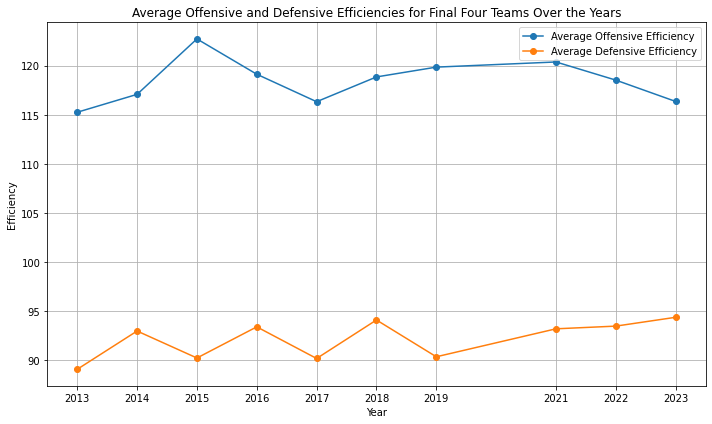

In [55]:
import matplotlib.pyplot as plt

def visualize_efficiencies(team_efficiencies_final_four_df):
    # Group data by year
    grouped_data = team_efficiencies_final_four_df.groupby('Year').mean()

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(grouped_data.index, grouped_data['Avg Off Eff'], label='Average Offensive Efficiency', marker='o')
    ax.plot(grouped_data.index, grouped_data['Avg Def Eff'], label='Average Defensive Efficiency', marker='o')

    # Adding labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Efficiency')
    ax.set_title('Average Offensive and Defensive Efficiencies for Final Four Teams Over the Years')
    
    # Adding legend
    ax.legend()

    # Display plot
    plt.grid(True)
    plt.xticks(grouped_data.index)
    plt.tight_layout()
    plt.show()

# Visualize the efficiencies
visualize_efficiencies(team_efficiencies_final_four_df)


# Display as a DF

In [56]:
yearly_averages_df = pd.DataFrame(yearly_averages_nested).transpose()

# Display the DataFrame
print("DataFrame of yearly averages of offensive and defensive efficiencies:")
print(yearly_averages_df)

DataFrame of yearly averages of offensive and defensive efficiencies:
      Avg Off Eff  Avg Def Eff
2013       115.25        89.05
2014       117.08        92.95
2015       122.72        90.20
2016       119.12        93.38
2017       116.32        90.15
2018       118.85        94.08
2019       119.85        90.32
2021       120.38        93.18
2022       118.52        93.45
2023       116.35        94.35


# Excercise 3: Underperforming Teams?
Let's examine the teams with the highest ADJOE and lowest ADJDE (lower is better for ADJDE) that did not make the Final Four. Surprisingly, one of them did not even make it to the tournament. This could be attributed to the reduced number of games played during the 2021 season due to the pandemic.

In [57]:
def add_team_stats(df):
    non_final_four_teams = df[~df['POSTSEASON'].isin(['F4', 'Champions', '2ND'])]
    top_teams_indices = non_final_four_teams.groupby('YEAR').apply(lambda x: x['ADJDE'].idxmin())
    top_teams = non_final_four_teams.loc[top_teams_indices]
    top_teams = top_teams[['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'POSTSEASON', 'SEED', 'YEAR']]
    return top_teams

top_teams_non_final_four = add_team_stats(df)
print(top_teams_non_final_four)


             TEAM  CONF   G   W  ADJOE  ADJDE POSTSEASON  SEED  YEAR
2342    Wisconsin   B10  35  23  107.2   84.3        R64   5.0  2013
34        Arizona   P12  38  33  116.2   87.4         E8   1.0  2014
2040     Virginia   ACC  34  30  112.1   84.1        R32   2.0  2015
2094  Wichita St.   MVC  34  25  110.3   87.8        R32  11.0  2016
2045     Virginia   ACC  34  23  111.8   86.9        R32   5.0  2017
2161     Virginia   ACC  34  31  114.6   86.7        R64   1.0  2018
2416     Michigan   B10  37  30  114.6   85.6        S16   2.0  2019
2776      Memphis  Amer  24  16  103.2   86.3        NaN   NaN  2021
2810   Texas Tech   B12  37  27  110.5   85.4        S16   3.0  2022
3175    Tennessee   SEC  36  25  111.2   87.5        S16   4.0  2023


# Excercise 4: Best Team not to win it all?
Lets look at the team with the highest ADJOE and lowest ADJDE (low is good for ADJDE) that did not win the championship. 

In [58]:
def teams(df):
    non_final_four_teams = df[~df['POSTSEASON'].isin(['Champions'])]
    top_teams_indices = non_final_four_teams.groupby('YEAR').apply(lambda x: x['ADJDE'].idxmin())
    top_teams = non_final_four_teams.loc[top_teams_indices]
    top_teams = top_teams[['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'POSTSEASON', 'SEED', 'YEAR']]
    return top_teams

top_teams = teams(df)
print(top_teams)

             TEAM  CONF   G   W  ADJOE  ADJDE POSTSEASON  SEED  YEAR
2342    Wisconsin   B10  35  23  107.2   84.3        R64   5.0  2013
34        Arizona   P12  38  33  116.2   87.4         E8   1.0  2014
49       Kentucky   SEC  39  38  120.3   84.0         F4   1.0  2015
2094  Wichita St.   MVC  34  25  110.3   87.8        R32  11.0  2016
4         Gonzaga   WCC  39  37  117.8   86.3        2ND   1.0  2017
2161     Virginia   ACC  34  31  114.6   86.7        R64   1.0  2018
3      Texas Tech   B12  38  31  115.2   85.2        2ND   3.0  2019
2776      Memphis  Amer  24  16  103.2   86.3        NaN   NaN  2021
2810   Texas Tech   B12  37  27  110.5   85.4        S16   3.0  2022
3175    Tennessee   SEC  36  25  111.2   87.5        S16   4.0  2023


# Excercise 5: Best Team not to make it?
Lets look at the team with the highest ADJOE and lowest ADJDE (low is good for ADJDE) that did not make the tournament. 

In [59]:
def teams(df):
    non_final_four_teams = df[df['POSTSEASON'].isna()]
    top_teams_indices = non_final_four_teams.groupby('YEAR').apply(lambda x: x['ADJDE'].idxmin())
    top_teams = non_final_four_teams.loc[top_teams_indices]
    top_teams = top_teams[['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'POSTSEASON', 'SEED', 'YEAR']]
    return top_teams

top_teams = teams(df)
print(top_teams)


                   TEAM  CONF   G   W  ADJOE  ADJDE POSTSEASON  SEED  YEAR
1894  Stephen F. Austin  Slnd  28  23   98.0   88.7        NaN   NaN  2013
1570           Illinois   B10  35  20  105.4   93.1        NaN   NaN  2014
1212            Florida   SEC  33  16  105.8   89.4        NaN   NaN  2015
125          Louisville   ACC  31  23  111.5   89.6        NaN   NaN  2016
131        Georgia Tech   ACC  36  21   99.4   90.6        NaN   NaN  2017
222                 UCF  Amer  32  19   97.4   93.5        NaN   NaN  2018
142             Clemson   ACC  34  20  107.2   90.3        NaN   NaN  2019
2776            Memphis  Amer  24  16  103.2   86.3        NaN   NaN  2021
2872       Oklahoma St.   B12  30  15  102.9   88.0        NaN   NaN  2022
3457            Rutgers   B10  34  19  105.4   91.0        NaN   NaN  2023


# Excercise 6: Compare Averages

Run the code cell below to calculate the average offensive and defensive efficiency for teams in the tournament that did not make the Final Four compared to those that did.

**IMPORTANT!** Two notes:
1. For the average, we excluded teams with NaN in the POSTSEASON column to eliminate teams that missed the tournament.
2. You will be prompted to enter two values after the code cell runs:
   - The first is whether you want to compare all the tournament teams against the Final Four teams. If so, please enter "NO" and run the next cell to graph.
   - If you want to refine the comparison by narrowing down the seeds (e.g., excluding mid-major at-large bids), enter "YES" for the first question and specify a range of seeds for the second question (1 being the highest). If you're not familiar with college basketball seeding, feel free to enter 


In [60]:
def parse_seed_filter(seed_filter_input):
    seed_filter = []
    try:
        min_seed, max_seed = map(int, seed_filter_input.split('-'))
        seed_filter.extend(range(min_seed, max_seed + 1))
    except ValueError:
        seed_filter = [int(seed.strip()) for seed in seed_filter_input.split(',')]
    return seed_filter

def calculate_non_final_four_yearly_averages(team_efficiencies_final_four_df, df, seed_filter=None):
    # Exclude teams with NaN in the POSTSEASON column
    if seed_filter:
        non_final_four_teams = df[(df['SEED'].isin(seed_filter)) & (df['POSTSEASON'].notna()) & (~df['POSTSEASON'].isin(['F4', 'Champions', '2ND']))]
    else:
        non_final_four_teams = df[(df['POSTSEASON'].notna()) & (~df['POSTSEASON'].isin(['F4', 'Champions', '2ND']))]
    
    yearly_averages_nested = {}
    for year, group in non_final_four_teams.groupby('YEAR'):
        avg_off_eff = round(group['ADJOE'].mean(), 2)
        avg_def_eff = round(group['ADJDE'].mean(), 2)
        yearly_averages_nested[year] = {'Avg Off Eff': avg_off_eff, 'Avg Def Eff': avg_def_eff}
    
    return yearly_averages_nested

# Prompt the user if they want to filter out lower seeds
filter_lower_seeds = input("Would you like to filter out the lower seeds? (yes/no): ")
if filter_lower_seeds.lower() == 'yes':
    # Prompt the user for seed filter input
    seed_filter_input = input("Enter seed filter (e.g., '1-12', '5,6,7'): ")
    seed_filter = parse_seed_filter(seed_filter_input)
else:
    seed_filter = None

# Calculate non-final four yearly averages with optional seed filter
yearly_averages_non_final_four_nested = calculate_non_final_four_yearly_averages(team_efficiencies_final_four_df, df, seed_filter)
print("Nested dictionary of yearly averages of offensive and defensive efficiencies for non-final four teams:")
print(yearly_averages_non_final_four_nested)


Would you like to filter out the lower seeds? (yes/no): no
Nested dictionary of yearly averages of offensive and defensive efficiencies for non-final four teams:
{2013: {'Avg Off Eff': 108.78, 'Avg Def Eff': 94.37}, 2014: {'Avg Off Eff': 112.05, 'Avg Def Eff': 97.93}, 2015: {'Avg Off Eff': 110.19, 'Avg Def Eff': 96.22}, 2016: {'Avg Off Eff': 111.2, 'Avg Def Eff': 97.66}, 2017: {'Avg Off Eff': 112.75, 'Avg Def Eff': 97.63}, 2018: {'Avg Off Eff': 111.75, 'Avg Def Eff': 98.21}, 2019: {'Avg Off Eff': 110.78, 'Avg Def Eff': 96.86}, 2021: {'Avg Off Eff': 109.31, 'Avg Def Eff': 95.54}, 2022: {'Avg Off Eff': 109.27, 'Avg Def Eff': 95.95}, 2023: {'Avg Off Eff': 111.64, 'Avg Def Eff': 97.97}}


# Graph the comparison:
Run the code cell below to visualize how the offensive and defensive efficiencies of teams in the Final Four compare to those that did not make it.



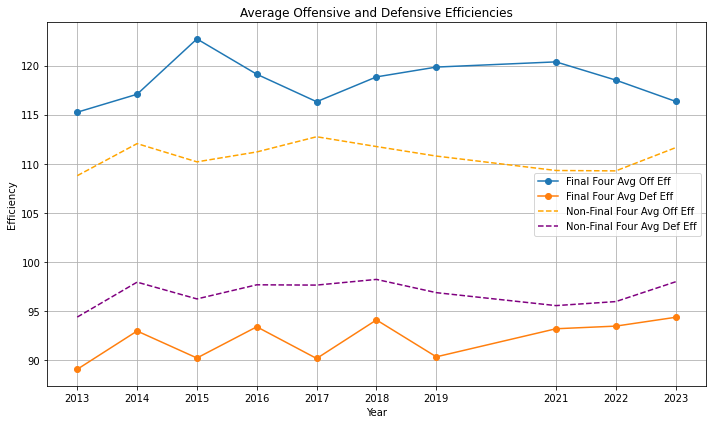

In [61]:
import matplotlib.pyplot as plt

# Calculate average efficiencies for non-final four teams
non_final_four_avg_efficiencies = calculate_non_final_four_yearly_averages(team_efficiencies_final_four_df, df, seed_filter)

# Get average offensive and defensive efficiencies for non-final four teams by year
non_final_four_avg_off_eff = [efficiency['Avg Off Eff'] for year, efficiency in non_final_four_avg_efficiencies.items()]
non_final_four_avg_def_eff = [efficiency['Avg Def Eff'] for year, efficiency in non_final_four_avg_efficiencies.items()]

# Plotting the data
plt.figure(figsize=(10, 6))

# Plotting final four team averages
plt.plot(yearly_averages_df.index, yearly_averages_df['Avg Off Eff'], marker='o', label='Final Four Avg Off Eff')
plt.plot(yearly_averages_df.index, yearly_averages_df['Avg Def Eff'], marker='o', label='Final Four Avg Def Eff')

# Plotting non-final four team averages
plt.plot(yearly_averages_df.index, non_final_four_avg_off_eff, color='orange', linestyle='--', label='Non-Final Four Avg Off Eff')
plt.plot(yearly_averages_df.index, non_final_four_avg_def_eff, color='purple', linestyle='--', label='Non-Final Four Avg Def Eff')

plt.xlabel('Year')
plt.ylabel('Efficiency')
plt.title('Average Offensive and Defensive Efficiencies')
plt.legend()
plt.grid(True)
plt.xticks(yearly_averages_df.index)
plt.tight_layout()

# Display the plot
plt.show()


# Final Thoughts:
    
As a basketball fan it was fun to delve into the realm of NCAA basketball championships through data analysis. My investigation has uncovered several intriguing aspects, from pinpointing off years for top seeds to dissecting the efficiencies of Final Four teams over the years. Here's a recap of my findings:

Off Years for Top Seeds:
I stumbled upon the revelation that in certain years, teams seeded 1, 2, or 3 failed to clinch the championship. This discovery prompts me to delve deeper into the contributing factors behind these unexpected upsets.

Efficiency of Final Four Teams:
By scrutinizing the offensive and defensive efficiencies of Final Four teams, I gained valuable insights into their performance levels. This analysis revealed noteworthy trends and variations in team strategies and capabilities across different seasons.

Yearly Averages of Efficiencies:
Visualizing the yearly averages of offensive and defensive efficiencies provided me with a clear picture of how these metrics evolved over time. It offered valuable insights into the overarching trends in team performance dynamics.

Underperforming Teams:
I identified teams boasting high offensive efficiency but lacking in defensive efficiency that failed to make it to the Final Four. This analysis underscores the crucial importance of maintaining a balanced performance across both offensive and defensive aspects.This one hurt as I am a Wisconsin fan and seeing Wisconsin lose in the round of 64 in 2013 brought back bad memories. 

Best Team Not to Win:
Through my investigation, I pinpointed the best-performing team that fell short of winning the championship. This highlighted instances where exceptional performance did not translate into ultimate success on the grand stage.

Best Team Not to Make It:
Exploring the team with the highest offensive efficiency and lowest defensive efficiency that didn't even secure a spot in the tournament emphasized the inherent unpredictability of sports outcomes.

Comparative Analysis:
Lastly, comparing the average efficiencies of tournament teams that didn't make the Final Four against those that did provided valuable insights into the performance gap between top-performing teams and the rest of the field.